<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C/feature_extraction_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Feature Extraction(특성 추출)**
### 한 컬럼에 여러 유형의 text가 있는 경우 각 text를 변수로 만들고 해당 text의 출현빈도를 해당 컬럼의 값으로 변환
#### CounterVector를 사용하면 Nice...

In [ ]:
# prompt: 알파벳 chatacter 를 1에서 5개까지 임의로 선택하여 값을 갖는 데이터 프레임 100개를 만들어줘,  단 각 글자는 스페이스를 넣어주고 글자만 추출해줘

import pandas as pd
import random
import string

def generate_random_string(min_chars, max_chars):
  """Generates a random string of uppercase letters with spaces."""
  num_chars = random.randint(min_chars, max_chars)
  return ' '.join(random.choice(string.ascii_uppercase) for _ in range(num_chars))

dataframes = []
for _ in range(100):
  # Create a dictionary with one column
  data = {'Random_String': [generate_random_string(1, 5)]}
  # Create a DataFrame from the dictionary
  df = pd.DataFrame(data)
  dataframes.append(df)

# Example of accessing and extracting letters from the first DataFrame
first_df = dataframes[0]
string_value = first_df['Random_String'].iloc[0]
# Extract only the letters (remove spaces)
letters_only = string_value.replace(" ", "")

print(f"Example DataFrame:\n{first_df}")
print(f"Original string value: '{string_value}'")
print(f"Letters only: '{letters_only}'")

# You now have a list of 100 DataFrames in the 'dataframes' list
# You can iterate through the list to access each DataFrame
# for i, df in enumerate(dataframes):
#   print(f"DataFrame {i+1}:\n{df}")


Example DataFrame:
  Random_String
0             U
Original string value: 'U'
Letters only: 'U'


In [ ]:
pd.DataFrame(dataframes)

ValueError: Must pass 2-d input. shape=(100, 1, 1)

In [ ]:
import pandas as pd
import random
import string

def generate_random_string(min_chars, max_chars):
  """Generates a random string of uppercase letters with spaces."""
  num_chars = random.randint(min_chars, max_chars)
  return ' '.join(random.choice(string.ascii_uppercase) for _ in range(num_chars))

dataframes = []
for _ in range(100):
  # Create a dictionary with one column
  data = {'Random_String': [generate_random_string(1, 5)]}
  # Create a DataFrame from the dictionary
  df = pd.DataFrame(data)
  dataframes.append(df)

# Example of accessing and extracting letters from the first DataFrame
first_df = dataframes[0]
string_value = first_df['Random_String'].iloc[0]
# Extract only the letters (remove spaces)
letters_only = string_value.replace(" ", "")

print(f"Example DataFrame:\n{first_df}")
print(f"Original string value: '{string_value}'")
print(f"Letters only: '{letters_only}'")

# You now have a list of 100 DataFrames in the 'dataframes' list
# You can iterate through the list to access each DataFrame
# for i, df in enumerate(dataframes):
#   print(f"DataFrame {i+1}:\n{df}")

# Concatenate the list of DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
print("\nCombined DataFrame (first 5 rows):")
print(combined_df.head())

Example DataFrame:
  Random_String
0             L
Original string value: 'L'
Letters only: 'L'

Combined DataFrame (first 5 rows):
  Random_String
0             L
1       R A E O
2             G
3             E
4     S D Q P Y


In [ ]:
combined_df

,Random_String
0,L
1,R A E O
2,G
3,E
4,S D Q P Y
...,...
95,P L S Z
96,G S
97,Y
98,C


In [ ]:
# prompt: countervector로 각 행의 글자를 컬럼으로 만들어 데이터프레임으로

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
# You can customize the tokenizer and other parameters as needed
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1)) # Analyze characters individually

# Fit the vectorizer on the 'Random_String' column and transform the data
X = vectorizer.fit_transform(combined_df['Random_String'])

# Get the feature names (characters)
feature_names = vectorizer.get_feature_names_out()

# Create a new DataFrame from the sparse matrix X
count_vectorized_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Optionally, you can concatenate this new DataFrame with the original combined_df
# result_df = pd.concat([combined_df, count_vectorized_df], axis=1)

# Display the first few rows of the new count vectorized DataFrame
print("\nCount Vectorized DataFrame (first 5 rows):")
print(count_vectorized_df.head())

# Display the column names (characters)
print("\nColumns (Characters):", count_vectorized_df.columns.tolist())


Count Vectorized DataFrame (first 5 rows):
      a  b  c  d  e  f  g  h  i  ...  q  r  s  t  u  v  w  x  y  z
0  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
1  3  1  0  0  0  1  0  0  0  0  ...  0  1  0  0  0  0  0  0  0  0
2  0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  0  0  0  0
3  0  0  0  0  0  1  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
4  4  0  0  0  1  0  0  0  0  0  ...  1  0  1  0  0  0  0  0  1  0

[5 rows x 27 columns]

Columns (Characters): [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
count_vectorized_df

,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
96,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count_vectorized_df.iloc[:, 1:]

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
96,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count_vectorized_df.iloc[:, 1:].max()

,0
a,2
b,2
c,1
d,1
e,1
f,1
g,1
h,1
i,1
j,2


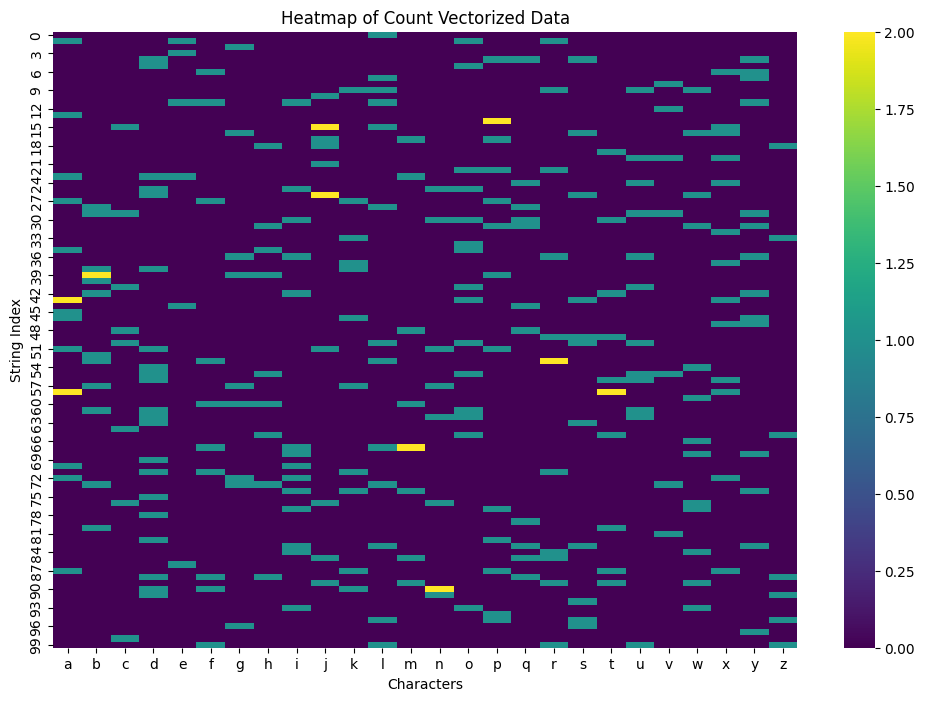

In [ ]:
# prompt: count_vectorized_df를 heatmap으로

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap of the count vectorized DataFrame
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
sns.heatmap(count_vectorized_df.iloc[:, 1:], annot=False, cmap='viridis') # annot=True shows the count values
plt.title('Heatmap of Count Vectorized Data')
plt.xlabel('Characters')
plt.ylabel('String Index')
plt.show()


In [ ]:
# prompt: 알파벳만 추출해줘 단 스페이스를 한 칸 넣어서 추출해줘

import re

def extract_alphabet_with_spaces(text):
  """
  Extracts only alphabet characters from a string and inserts a space between them.

  Args:
    text: The input string.

  Returns:
    A string containing only alphabet characters with spaces in between.
  """
  return " ".join(re.findall(r'[a-zA-Z]', text))

# Example usage with one of the dataframes
# Assuming you want to process the 'random_string' column of the first dataframe
if dfs:
    first_df = dfs[0]
    if 'random_string' in first_df.columns:
        for random_string in first_df['random_string']:
            extracted_string = extract_alphabet_with_spaces(random_string)
            print(f"Original: {random_string}")
            print(f"Extracted: {extracted_string}")
            print("-" * 20)
else:
    print("No dataframes in the 'dfs' list.")


Original: gttz
Extracted: g t t z
--------------------


In [ ]:
first_df

,random_string
0,gttz
